## WILDFIRE DETECTION USING CONVOLUTIONAL NEURAL NETWORK AND VGG16 

### IMPORTING LIBRAIERS


In [76]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Dropout

import keras as keras
from keras.preprocessing.image import ImageDataGenerator


### CLEAING OUR IMAGES DATA FOR TRANING SET

In [2]:
import os
from PIL import Image
from tqdm import tqdm
train_df='/Users/mehakpreetsingh/Documents/DATA   SCIENCE/DATA SCIENCE PROJECT/Wildfire Dectection CNN/forest_fire/Training'
for root,_,files in os.walk(train_df):
    for i in tqdm(files,desc='processing images'):
        file_path_training=os.path.join(root,i)
        try:
            img=Image.open(file_path_training)
            img.verify()
        except Exception as e:
               os.remove(file_path_training)
   
        
    
    


processing images: 100%|██████████| 904/904 [00:00<00:00, 3538.27it/s]


#### USING IMAGE GENERATOR TRANSFORM OUR DATASET INTO TRANING SET

In [77]:
train_df_gen=ImageDataGenerator(rescale=1./255,zoom_range=0.0,horizontal_flip=True)
train_data_set=train_df_gen.flow_from_directory(train_df,batch_size=32,class_mode='binary',target_size=(64,64))

Found 1832 images belonging to 2 classes.


### CLEAING OUR IMAGES DATA FOR TESTING  SET

In [3]:
import os
from PIL import Image
from tqdm import tqdm
test_df='/Users/mehakpreetsingh/Documents/DATA   SCIENCE/DATA SCIENCE PROJECT/Wildfire Dectection CNN/forest_fire/Testing'
for root,_,files in os.walk(test_df):
    for i in tqdm(files,desc='processing images'):
        file_path_testing=os.path.join(root,i)
        try:
            img=Image.open(file_path_testing)
            img.verify()
        except Exception as e:
            
            os.remove(file_path_testing)
        
        
   
        
    
    


processing images: 0it [00:00, ?it/s]
processing images: 100%|██████████| 46/46 [00:00<00:00, 3761.27it/s]


#### USING IMAGE GENERATOR TRANSFORM OUR DATASET INTO TRANING SET

In [58]:
test_df_gen=ImageDataGenerator(rescale=1./255)
test_data_set=test_df_gen.flow_from_directory(test_df,batch_size=32,class_mode='binary',target_size=(64,64))

Found 68 images belonging to 2 classes.


##### VISULIZATION OF OUR TRAINING DATA

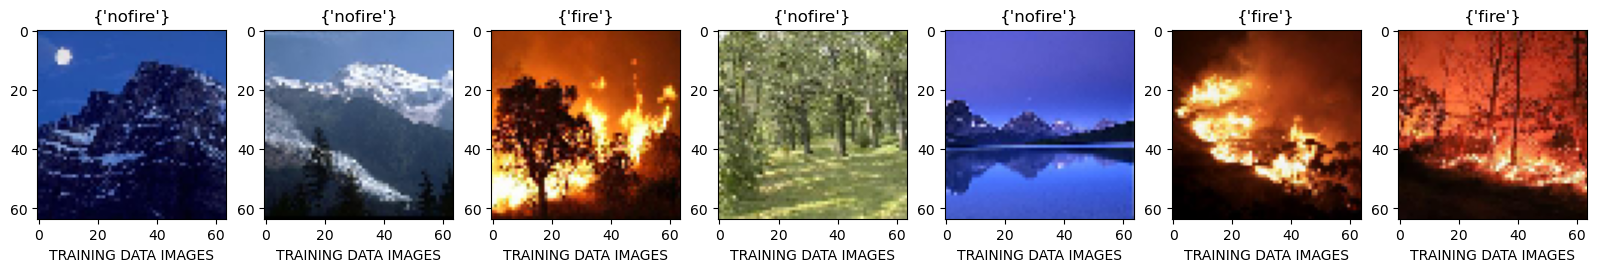

In [59]:
num=7
images, lables=next(train_data_set)

class_train=train_data_set.class_indices
index_train={v: k for k , v in class_train.items()}

plt.figure(figsize=(20,6))
for i in range(num):
    
    plt.subplot(2,num,i+1)
    plt.imshow(images[i])
    plt.xlabel('TRAINING DATA IMAGES')
    plt.title({index_train[lables[i]]})
    






##### VISULIZATION OF OUR TESITNG DATA

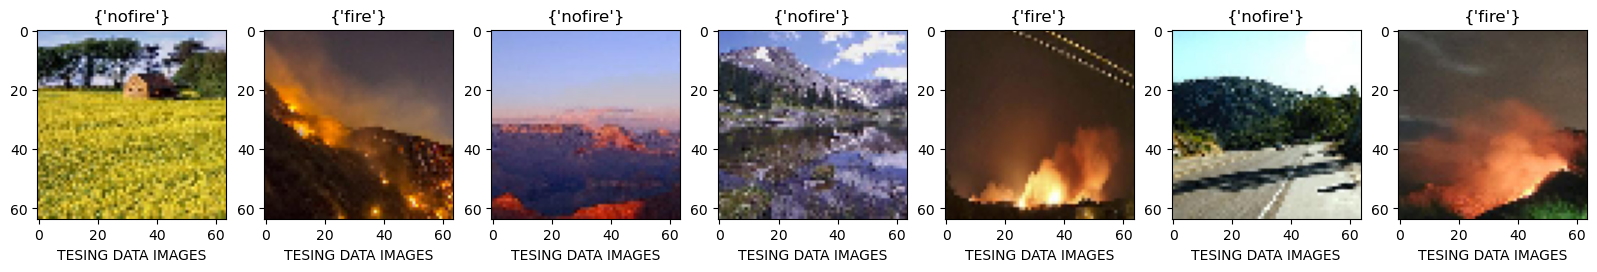

In [60]:
num=7

images, lables=next(test_data_set)

class_test=test_data_set.class_indices
index_test={v: k for k , v in class_test.items()}

plt.figure(figsize=(20,6))

for i in range(num):
    plt.subplot(2,num,i+1)
    plt.imshow(images[i])
    plt.title({index_test[lables[i]]})
    plt.xlabel('TESING DATA IMAGES')

### Making convolutional neural network 

In [62]:
CNN=tf.keras.models.Sequential()

##### Adding First convolutional neural network Layer

In [63]:
CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,input_shape=[64,64,3],activation='relu'))
BatchNormalization()

#### Adding First Pooling Layer

In [64]:
CNN.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))

#### Adding Second Convonutional Layer

#### Adding Second Pooling Layer


In [65]:
CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu'))
BatchNormalization()
CNN.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))



#### Adding Flatten Layer


In [66]:
CNN.add(tf.keras.layers.Flatten())


### Now Using ANN logic adding  Hidden layers 

In [67]:
CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
Dropout(0.4)

### Now Using ANN logic adding output layer 

In [68]:
CNN.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

### Compling our CNN Model use Binary_crossentropy for binary classification 

In [69]:
CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### Fit our model on trained data and validation over Test data 

In [70]:
history=CNN.fit(x=train_data_set,validation_data=test_data_set,batch_size=32,epochs=20)

Epoch 1/20
58/58 [==============================] - 3s 51ms/step - loss: 0.2566 - accuracy: 0.8930 - val_loss: 0.2787 - val_accuracy: 0.9265
Epoch 2/20
58/58 [==============================] - 3s 52ms/step - loss: 0.1804 - accuracy: 0.9323 - val_loss: 0.2189 - val_accuracy: 0.9559
Epoch 3/20
58/58 [==============================] - 3s 46ms/step - loss: 0.1457 - accuracy: 0.9487 - val_loss: 0.2575 - val_accuracy: 0.8824
Epoch 4/20
58/58 [==============================] - 2s 39ms/step - loss: 0.1226 - accuracy: 0.9629 - val_loss: 0.2164 - val_accuracy: 0.9265
Epoch 5/20
58/58 [==============================] - 4s 61ms/step - loss: 0.1110 - accuracy: 0.9651 - val_loss: 0.2506 - val_accuracy: 0.9265
Epoch 6/20
58/58 [==============================] - 4s 72ms/step - loss: 0.1142 - accuracy: 0.9634 - val_loss: 0.2002 - val_accuracy: 0.9412
Epoch 7/20
58/58 [==============================] - 3s 48ms/step - loss: 0.1003 - accuracy: 0.9689 - val_loss: 0.1616 - val_accuracy: 0.9559
Epoch 8/20
58

#### Accuracy of our CNN model 

In [84]:
loss , Accuracy_cnn=CNN.evaluate(test_data_set)
print(F'The Accuracy of VGG16 MODEL IS {Accuracy_cnn*100:.2f}%')


3/3 [==============================] - 0s 18ms/step - loss: 0.0731 - accuracy: 0.9559
The Accuracy of VGG16 MODEL IS 95.59%


### Visulazation of our Model Loss vs epochs

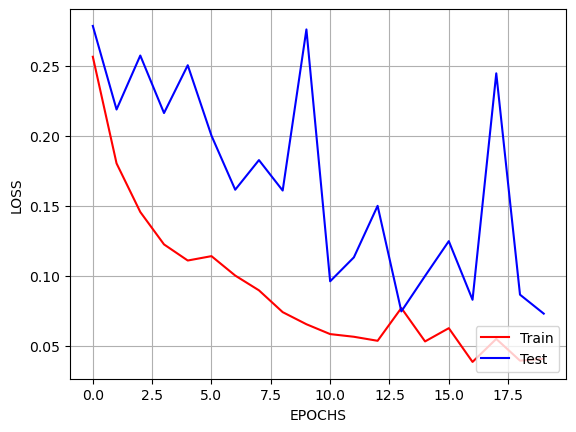

In [72]:
plt.plot(history.history['loss'],label='Train',color='red')
plt.plot(history.history['val_loss'],label='Test',color='blue')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(loc='lower right')
plt.grid(True)

### Visulazation of our Model Accuracy vs epochs

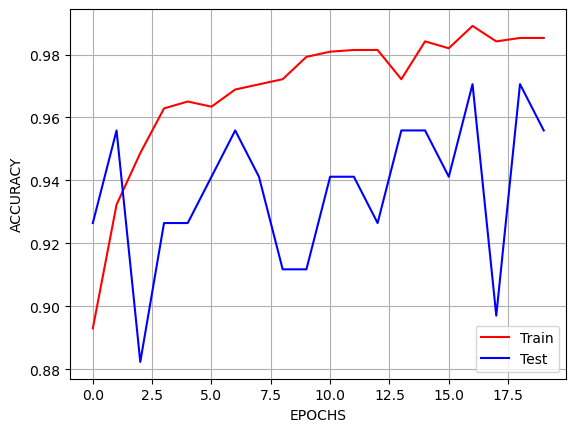

In [73]:
plt.plot(history.history['accuracy'],label='Train',color='red')
plt.plot(history.history['val_accuracy'],label='Test',color='blue')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend(loc='lower right')
plt.grid(True)

#### Now Taking 1st Prediction from our CNN model 

1/1 [==============================] - 0s 108ms/step
THE PREDICTION OF INPUT IMAGE IS 0.9992794990539551


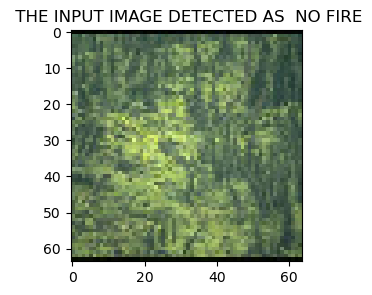

In [74]:
from tensorflow.keras.preprocessing import image
img_path ='/Users/mehakpreetsingh/Documents/DATA   SCIENCE/DATA SCIENCE PROJECT/Wildfire Dectection CNN/forest_fire/Training/nofire/nofire_0055.jpg'
input_image = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(input_image) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction_img = CNN.predict(img_array)[0][0]  # Get single value probability

print(f'THE PREDICTION OF INPUT IMAGE IS {prediction_img}')

plt.figure(figsize=(10,3))

if prediction_img >0.5:
       OUTPUT_NFIRE=  ' THE INPUT IMAGE DETECTED AS  NO FIRE'
       
       
       
       plt.imshow(input_image)
       plt.title(OUTPUT_NFIRE)

    
    
elif prediction_img<0.5:
     
     OUTPUT_FIRE=  'THE INPUT IMAGE DETECTED AS  WILD FIRE'
     plt.imshow(input_image)
     plt.title(OUTPUT_FIRE)



#### Now Taking 2nd Prediction from our CNN model 

1/1 [==============================] - 0s 22ms/step
THE PREDICTION OF INPUT IMAGE IS 0.009056184440851212


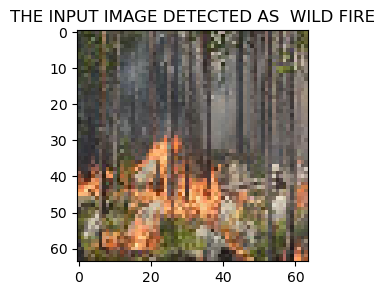

In [75]:
from tensorflow.keras.preprocessing import image
img_path ='/Users/mehakpreetsingh/Documents/DATA   SCIENCE/DATA SCIENCE PROJECT/Wildfire Dectection CNN/forest_fire/Training/fire/fire_0270.jpg'
input_image = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(input_image) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction_img = CNN.predict(img_array)[0][0]  

print(f'THE PREDICTION OF INPUT IMAGE IS {prediction_img}')

plt.figure(figsize=(10,3))
if prediction_img >0.5:
       OUTPUT_NFIRE=  ' THE INPUT IMAGE DETECTED AS  NO FIRE'
       
       
       
       plt.imshow(input_image)
       plt.title(OUTPUT_NFIRE)
    
    
elif prediction_img<0.5:
     
     OUTPUT_FIRE=  'THE INPUT IMAGE DETECTED AS  WILD FIRE'
     plt.imshow(input_image)
     plt.title(OUTPUT_FIRE)



#                            MAKING OF VGG16 MODEL FOR  IMAGE RECOGINATION

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

base_model=VGG16(include_top=False,input_shape=(64,64,3),weights='imagenet')

for layers in base_model.layers:
    layers.trainable=False


x=Flatten()(base_model.output)
x=Dense(units=128,activation='relu')(x)
x=Dense(units=1,activation='sigmoid')(x)


model_vgg16=Model(inputs=base_model.inputs,outputs=x)


#### Compling our VGG16 MODEL

In [79]:
model_vgg16.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history =model_vgg16.fit(x=train_data_set,validation_data=test_data_set,batch_size=32,epochs=20)

Epoch 1/20
58/58 [==============================] - 43s 737ms/step - loss: 0.0302 - accuracy: 0.9874 - val_loss: 0.2536 - val_accuracy: 0.9118
Epoch 2/20
58/58 [==============================] - 45s 770ms/step - loss: 0.0313 - accuracy: 0.9885 - val_loss: 0.2592 - val_accuracy: 0.9412
Epoch 3/20
58/58 [==============================] - 50s 867ms/step - loss: 0.0234 - accuracy: 0.9896 - val_loss: 0.2291 - val_accuracy: 0.9559
Epoch 4/20
58/58 [==============================] - 48s 827ms/step - loss: 0.0279 - accuracy: 0.9885 - val_loss: 0.2978 - val_accuracy: 0.9118
Epoch 5/20
58/58 [==============================] - 47s 806ms/step - loss: 0.0154 - accuracy: 0.9940 - val_loss: 0.2477 - val_accuracy: 0.9412
Epoch 6/20
58/58 [==============================] - 44s 761ms/step - loss: 0.0103 - accuracy: 0.9984 - val_loss: 0.2829 - val_accuracy: 0.9412
Epoch 7/20
58/58 [==============================] - 40s 695ms/step - loss: 0.0081 - accuracy: 0.9967 - val_loss: 0.2715 - val_accuracy: 0.9559

#### Acuuracy of  VGG16 MODEL

#### Accuracy for VGG16

In [93]:
Loss, Accuracy_VGG16=model_vgg16.evaluate(test_data_set)
print(f'THE ACCURACY OF VGG16 MODEL IS {Accuracy_VGG16*100:.2f}%')

3/3 [==============================] - 1s 340ms/step - loss: 0.3524 - accuracy: 0.9412
THE ACCURACY OF VGG16 MODEL IS 94.12%


#### Graph of Loss vs epochs

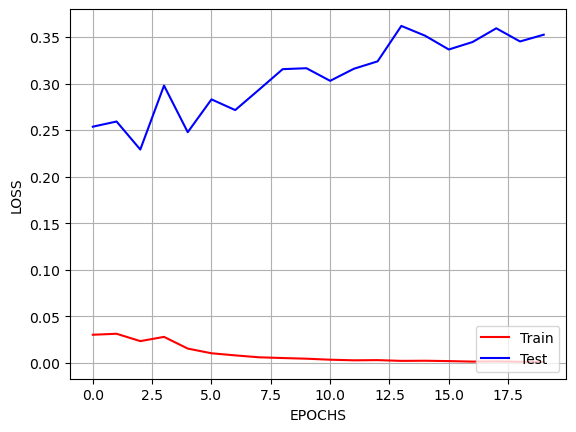

In [85]:
plt.plot(history.history['loss'],label='Train',color='red')
plt.plot(history.history['val_loss'],label='Test',color='blue')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(loc='lower right')
plt.grid(True)

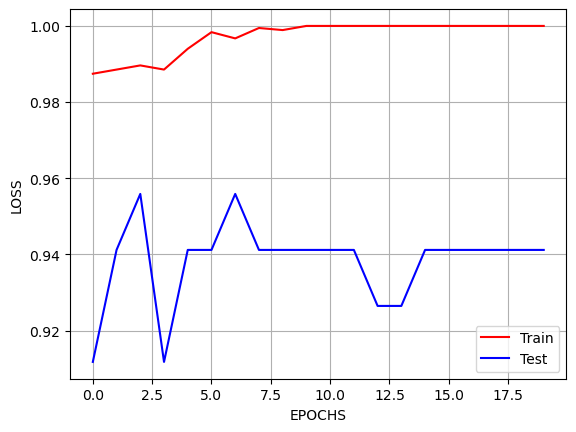

In [87]:
plt.plot(history.history['accuracy'],label='Train',color='red')
plt.plot(history.history['val_accuracy'],label='Test',color='blue')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(loc='lower right')
plt.grid(True)

#### Taking 1st Prediction from VGG16 MODEL

1/1 [==============================] - 0s 86ms/step
THE PREDICTION OF INPUT IMAGE IS 0.0027770481538027525


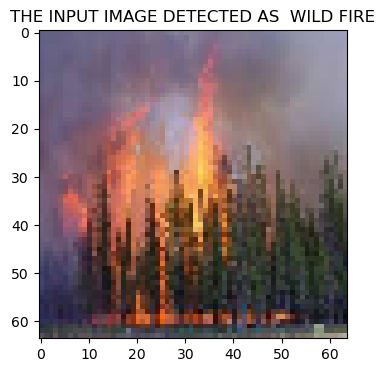

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

input_image_vgg16 = image.load_img('/Users/mehakpreetsingh/Downloads/images.jpeg',target_size=(64,64))
arr_img=image.img_to_array(input_image_vgg16)
arr_img=arr_img/255.0

imag_dimx=np.expand_dims(arr_img,axis=0)



predict_img = model_vgg16.predict(imag_dimx)[0][0] 
print(f'THE PREDICTION OF INPUT IMAGE IS {predict_img}')



plt.figure(figsize=(10,4))
if predict_img >0.5:
       OUTPUT_NFIRE=  ' THE INPUT IMAGE DETECTED AS  NO FIRE'
       
       
       
       plt.imshow(input_image_vgg16)
       plt.title(OUTPUT_NFIRE)
    
    
elif predict_img<0.5:
     
     OUTPUT_FIRE=  'THE INPUT IMAGE DETECTED AS  WILD FIRE'
     plt.imshow(input_image_vgg16)
     plt.title(OUTPUT_FIRE)


#### Taking 2nd Prediction from VGG16 MODEL

1/1 [==============================] - 0s 83ms/step
THE PREDICTION OF INPUT IMAGE IS 0.9999968409538269


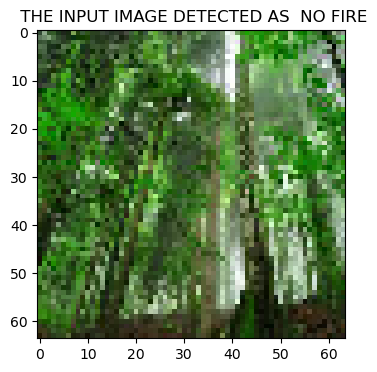

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess image
input_image_vgg16 = image.load_img('/Users/mehakpreetsingh/Downloads/images-3.jpeg',target_size=(64,64))
arr_img=image.img_to_array(input_image_vgg16)
arr_img=arr_img/255.0

imag_dimx=np.expand_dims(arr_img,axis=0)



predict_img = model_vgg16.predict(imag_dimx)[0][0] 
print(f'THE PREDICTION OF INPUT IMAGE IS {predict_img}')


plt.figure(figsize=(10,4))


if predict_img >0.5:
       OUTPUT_NFIRE=  ' THE INPUT IMAGE DETECTED AS  NO FIRE'
       
       
       
       plt.imshow(input_image_vgg16)
       plt.title(OUTPUT_NFIRE)
    
    
elif predict_img<0.5:
     
     OUTPUT_FIRE=  'THE INPUT IMAGE DETECTED AS  WILD FIRE'
     plt.imshow(input_image_vgg16)
     plt.title(OUTPUT_FIRE)


#### COMPARING BOTH MODEL ACCURACY

In [104]:
import pandas as pd

comp_df=pd.DataFrame({'Model':['Convonutinal Neraul Network','VGG16' ] ,
                        'Accuracy_score':[Accuracy_cnn*100,Accuracy_VGG16*100]})


comp_df.sort_values(by='Accuracy_score',ascending=False)

,Model,Accuracy_score
0,Convonutinal Neraul Network,95.588237
1,VGG16,94.117647
